# Analisis de Base de datos del proyecto: IMPACTO DE LA FORMALIZACIÓN EMPRESARIAL EN COLOMBIA


JUAN DAVID OSPINA SILVA


La base de datos utilizada en este estudio proviene de la Encuesta de Micronegocios del Departamento Administrativo Nacional de Estadística (DANE), la cual recopila información detallada sobre las características, estructura y funcionamiento de los micronegocios en Colombia. Se han seleccionado los datos correspondientes a los años 2021, 2022 y 2023, con el objetivo de consolidar una fuente de información robusta para el desarrollo de un modelo de aprendizaje no supervisado.
Fuente y Consolidación de los Datos
Originalmente, los datos se encontraban distribuidos en 36 archivos CSV, correspondientes a 12 módulos por cada año. Para facilitar su manejo y análisis, se realizó un proceso de consolidación en el que se fusionaron los archivos de cada año en un único archivo CSV, resultando en tres archivos, uno por año. Esta integración permitió una mayor eficiencia en la manipulación de la información y en la preparación de los datos para el modelo de inteligencia artificial.
Módulos y Variables
Los datos están organizados en los siguientes módulos, con el número de variables correspondiente a cada uno:
Módulo de Capital Social (80 variables)
Módulo de Características del Micronegocio (19 variables)
Módulo de Costos, Gastos y Activos (47 variables)
Módulo de Emprendimiento (11 variables)
Módulo de Identificación (20 variables)
Módulo de Inclusión Financiera (42 variables)
Módulo de Sitio o Ubicación (15 variables)
Módulo de TIC (35 variables)
Módulo de Ventas o Ingresos (72 variables)
Módulo de Personal Ocupado (20 variables)
Módulo de Personal Ocupado (Propietario) (15 variables)
Factor de Expansión Departamentales (3 variables)
Después del proceso de consolidación y análisis de cobertura, se decidió excluir los módulos de Personal Ocupado y Factores de Expansión Departamentales debido a su insuficiencia de registros. Mientras que los demás módulos presentaban más de 80,000 registros, estos módulos apenas contaban con 20,000 registros, lo que no resultaba adecuado para entrenar un modelo de aprendizaje no supervisado.
Estructura y Tipos de Datos
Tras la integración de los datos, la base de datos cuenta con 80,847 registros y 347 variables, distribuidas de la siguiente manera:
Variables de tipo object (346): Estas representan en su mayoría datos categóricos o texto, incluyendo identificadores, descripciones y respuestas en formato nominal.
Variables de tipo float64 (1): Esta es la única variable numérica en formato flotante, que probablemente corresponde a valores cuantitativos, como montos financieros o factores de expansión.
Dado el alto número de variables categóricas (object), se puede concluir que la base de datos contiene principalmente datos nominales y ordinales, lo que es relevante para la aplicación de técnicas de aprendizaje no supervisado, como la segmentación y agrupamiento de micronegocios con características similares.
Para limpiar un poco más la base de datos, se eliminarán las variables (columnas) que tengan mayor a un 20% de valores nulos, dando como resultado una base de datos con 80,847 registros y 125 variables, ya que se eliminaron 232 variables.


AUTORES

👨‍💻 JUAN DAVID OSPINA SILVA

📧 Contacto: juandaospi20@gmail.com

👨‍💻 MARIA ANGÉLICA PÉREZ RAMOS

📧 Contacto: mariaaperez78@gmail.com

👨‍💻 Paula Andrea Gómez González

📧 Contacto: p.andreagomezgonzalez@gmail.com

👨‍💻 MARIALENA OROZCO

📧 Contacto: marialenaorozco@hotmail.com

👨‍💻 Luisa Fernanda Gómez Agudelo

📧 Contacto: luisafg.agudelo@gmail.com

🚀 Este cuaderno ha sido diseñado para aplicar un modelo de aprendizaje no supervisado, el cual es K - means. ya que la información que almacenada en la base de datos no esta etiquetada, por lo que se busca encontrar grupos con características similares en las microempresas colombianas🎯

In [ ]:
# @title Conexión con la base de datos desde una URL

#@markdown - Forma 1 de descarga de archivos desde Google Drive con wget
# Forma de descarga de archivos desde Google Drive con wget
# Se requiere el uso de cookies para la autenticación
# Se debe obtener el ID del archivo de Google Drive para poder descargarlo
# Se usa el comando wget para descargar el archivo, gestionando las cookies
# param url: URL de la base de datos
# param nombre_archivo: Nombre del archivo a guardar

#2023
# URL = 'https://docs.google.com/spreadsheets/d/1mUxGMCDvlL4odIkPHtGbTJqFLf9b08I7/edit?usp=sharing&ouid=101363511302289828378&rtpof=true&sd=true'
# Definir el ID del archivo de Google Drive
FILEID = '1mUxGMCDvlL4odIkPHtGbTJqFLf9b08I7'
nombre_archivo_2023 = '2023_COMPLETO.xlsx'

# Descargar el archivo usando wget, gestionando las cookies
# Se usa --load-cookies para cargar las cookies guardadas temporalmente en /tmp/cookies.txt
# Se hace una primera solicitud con wget para obtener el token de confirmación que Google Drive envía cuando el archivo es grande o muy accedido
# El token se extrae usando sed (una utilidad para filtrar y procesar texto), que busca el patrón "confirm=" y captura el valor del token
# Una vez obtenido el token de confirmación, se realiza la descarga completa del archivo
# --no-check-certificate es usado para evitar errores de SSL (certificados) en entornos no seguros
# El archivo se guarda como "2023_COMPLETO.xlsx" . indicado con el nombre del archivo en la variable "nombre_archivo"
# Finalmente, se eliminan las cookies temporales almacenadas en /tmp/cookies.txt

# con esta instrucción se descarga el archivo desde Google Drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $nombre_archivo_2023 && rm -rf /tmp/cookies.txt

#2022
# URL = 'https://docs.google.com/spreadsheets/d/1tN6lP_wjFXDshORU5lk6IxhoDTUOKorS/edit?usp=drive_link&ouid=101363511302289828378&rtpof=true&sd=true'
# Definir el ID del archivo de Google Drive
FILEID = '1tN6lP_wjFXDshORU5lk6IxhoDTUOKorS'
nombre_archivo_2022 = '2022_COMPLETO.xlsx'

# Descargar el archivo usando wget, gestionando las cookies
# Se usa --load-cookies para cargar las cookies guardadas temporalmente en /tmp/cookies.txt
# Se hace una primera solicitud con wget para obtener el token de confirmación que Google Drive envía cuando el archivo es grande o muy accedido
# El token se extrae usando sed (una utilidad para filtrar y procesar texto), que busca el patrón "confirm=" y captura el valor del token
# Una vez obtenido el token de confirmación, se realiza la descarga completa del archivo
# --no-check-certificate es usado para evitar errores de SSL (certificados) en entornos no seguros
# El archivo se guarda como "2022_COMPLETO.xlsx . indicado con el nombre del archivo en la variable "nombre_archivo"
# Finalmente, se eliminan las cookies temporales almacenadas en /tmp/cookies.txt

# con esta instrucción se descarga el archivo desde Google Drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $nombre_archivo_2022 && rm -rf /tmp/cookies.txt

#2021
# URL = 'https://docs.google.com/spreadsheets/d/1mUxGMCDvlL4odIkPHtGbTJqFLf9b08I7/edit?usp=drive_link&ouid=101363511302289828378&rtpof=true&sd=true'
# Definir el ID del archivo de Google Drive
FILEID = '1mUxGMCDvlL4odIkPHtGbTJqFLf9b08I7'
nombre_archivo_2021 = '2021_COMPLETO.xlsx'

# Descargar el archivo usando wget, gestionando las cookies
# Se usa --load-cookies para cargar las cookies guardadas temporalmente en /tmp/cookies.txt
# Se hace una primera solicitud con wget para obtener el token de confirmación que Google Drive envía cuando el archivo es grande o muy accedido
# El token se extrae usando sed (una utilidad para filtrar y procesar texto), que busca el patrón "confirm=" y captura el valor del token
# Una vez obtenido el token de confirmación, se realiza la descarga completa del archivo
# --no-check-certificate es usado para evitar errores de SSL (certificados) en entornos no seguros
# El archivo se guarda como "2021_COMPLETO.xlsx" . indicado con el nombre del archivo en la variable "nombre_archivo"
# Finalmente, se eliminan las cookies temporales almacenadas en /tmp/cookies.txt

# con esta instrucción se descarga el archivo desde Google Drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $nombre_archivo_2021 && rm -rf /tmp/cookies.txt

--2025-03-15 20:10:29--  https://docs.google.com/uc?export=download&confirm=&id=1mUxGMCDvlL4odIkPHtGbTJqFLf9b08I7
Resolving docs.google.com (docs.google.com)... 142.250.99.138, 142.250.99.100, 142.250.99.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.99.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1mUxGMCDvlL4odIkPHtGbTJqFLf9b08I7&export=download [following]
--2025-03-15 20:10:29--  https://drive.usercontent.google.com/download?id=1mUxGMCDvlL4odIkPHtGbTJqFLf9b08I7&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.188.132, 2607:f8b0:400e:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29935168 (29M) [application/octet-stream]
Saving to: ‘2023_COMPLETO.xlsx’

2023_COMPLETO.xlsx  100%[===================>]  28.55M

# Desglose:

- FILEID = '1M8fB-SdAEZZ98_jEaM5ifyhlh9np3D99': El ID del archivo de Google Drive que se desea descargar.
- Primera llamada wget:
Obtiene un token de confirmación cuando Google Drive requiere verificación extra para archivos grandes o descargados muchas veces.\
Usa sed para buscar y extraer el token de la respuesta de Google Drive.
- Segunda llamada wget:
Con el token, se realiza la descarga final del archivo.\
rm -rf /tmp/cookies.txt: Limpia las cookies temporales después de completar la descarga.

In [ ]:
# @title Instalar librerias a usar
%pip install sweetviz
%pip install missingno

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 83.1 MB/s eta 0:00:00


In [ ]:
# @title Carga de librerias
# Bibliotecas utilizadas
# ----------------------------------------------------------------------------
# pandas (pd): librería para el análisis de datos
# matplotlib (plt): librería para crear gráficos
# seaborn (sns): librería para visualizar datos de manera estética
# Sweetviz (sw): Una biblioteca de análisis y visualización de datos en Python.
# files : Importa la función para subir y descargar archivos en Google Colab.
import os
import pandas as pd
import matplotlib.pyplot as plt
#importar varias funciones de una libreria
#import from marplotlib import pyplot as plt, function1 as f1, function2 as f2
import seaborn as sns
import sweetviz as sw
from google.colab import files
import numpy as np
import missingno as msno
import polars as pl


In [ ]:
# @title Cargamos las funciones relacionadas
def analizar_columnas(df):
  """
  Analiza las columnas de un DataFrame y devuelve información estadística.

  Parámetros:
  df (DataFrame): El DataFrame a analizar.

  Retorno:
  Un DataFrame con la información estadística de cada columna.

  Ejemplo:
  df_analizado = analizar_columnas(df)
  print(df_analizado)
  """
  info = []
  for columna in df.columns:
    unicos = df[columna].nunique()
    nulos = df[columna].isnull().sum()
    total = len(df)
    porcentaje_nulos = (nulos / total) * 100
    info.append({
      'Columna': columna,
      'Cantidad de registros': total,
      'Únicos': unicos,
      'Cantidad de nulos': nulos,
      'Porcentaje de nulos': porcentaje_nulos,
      'Registros relacionados con nulos': total - nulos
    })
  return pd.DataFrame(info)


# Sección 1

### Paso 1: Cargar el archivo CSV

In [ ]:
%pip install fastexcel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.6 MB/s eta 0:00:00


In [ ]:
# @title Cargar el archivo xlsx de canciones de Spotify
# Ubicación en donde se almacena en drive
df_completo_2021 = pl.read_excel(nombre_archivo_2021)
df_completo_2022 = pl.read_excel(nombre_archivo_2022)
df_completo_2023 = pl.read_excel(nombre_archivo_2023)
df_completo_2021 = df_completo_2021.to_pandas()
df_completo_2022 = df_completo_2022.to_pandas()
df_completo_2023 = df_completo_2023.to_pandas()

df_completo_2021.drop(index=0, inplace=True)
df_completo_2022.drop(index=0, inplace=True)
df_completo_2023.drop(index=0, inplace=True)

# Mostrar las primeras filas del archivo para ver cómo están organizados los datos
print("Primeras 5 filas de los datos: ")
df_completo_2021.head()


Primeras 5 filas de los datos: 


,DIRECTORIO,SECUENCIA_P,SECUENCIA_ENCUESTA,P3002,P3003_1,P3003_2,P3003_3,P3003_4,P3003_5,P3003_6,...,P3090,P2989,P3091,SUELDOS,PRESTACIONES,REMUNERACION_TOTAL,CLASE_TE_9,COD_DEPTO_9,AREA_9,F_EXP_9
1,7277093.0,1,1,2,None,None,None,None,None,None,...,2,2,2,0,0,0,2,5,None,348373147591954
2,7277104.0,1,1,2,None,None,None,None,None,None,...,2,2,1,None,0,0,1,5,5,874156970299431
3,7277108.0,1,3,2,None,None,None,None,None,None,...,2,2,1,None,0,0,1,5,5,741007415902177
4,7277114.0,1,1,2,None,None,None,None,None,None,...,2,2,3,2600000,336000,2936000,1,5,5,132473094961111
5,7277119.0,1,1,2,None,None,None,None,None,None,...,2,2,1,None,0,0,2,5,None,147852291906858


In [ ]:
print("2021")
df_completo_2021.info()
print("2022")
df_completo_2022.info()
print("2023")
df_completo_2023.info()

2021
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26948 entries, 1 to 26948
Columns: 347 entries, DIRECTORIO to F_EXP_9
dtypes: float64(1), object(346)
memory usage: 71.3+ MB
2022
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26948 entries, 1 to 26948
Columns: 347 entries, DIRECTORIO to F_EXP_9
dtypes: float64(1), object(346)
memory usage: 71.3+ MB
2023
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26948 entries, 1 to 26948
Columns: 347 entries, DIRECTORIO to F_EXP_9
dtypes: float64(1), object(346)
memory usage: 71.3+ MB


In [ ]:
# Concatenate the dataframes
df_concatenated = pd.concat([df_completo_2021, df_completo_2022, df_completo_2023], axis=0, ignore_index=True)

# Display the first few rows of the concatenated dataframe
df_concatenated.head()

,DIRECTORIO,SECUENCIA_P,SECUENCIA_ENCUESTA,P3002,P3003_1,P3003_2,P3003_3,P3003_4,P3003_5,P3003_6,...,P3090,P2989,P3091,SUELDOS,PRESTACIONES,REMUNERACION_TOTAL,CLASE_TE_9,COD_DEPTO_9,AREA_9,F_EXP_9
0,7277093.0,1,1,2,None,None,None,None,None,None,...,2,2,2,0,0,0,2,5,None,348373147591954
1,7277104.0,1,1,2,None,None,None,None,None,None,...,2,2,1,None,0,0,1,5,5,874156970299431
2,7277108.0,1,3,2,None,None,None,None,None,None,...,2,2,1,None,0,0,1,5,5,741007415902177
3,7277114.0,1,1,2,None,None,None,None,None,None,...,2,2,3,2600000,336000,2936000,1,5,5,132473094961111
4,7277119.0,1,1,2,None,None,None,None,None,None,...,2,2,1,None,0,0,2,5,None,147852291906858


In [ ]:
df_concatenated.shape

(80844, 347)

In [ ]:
# Copia de la base de datos concatenada
df_concatenated_ = df_concatenated.copy()

In [ ]:
# @title Visualización de composición de la base de datos.
df_concatenated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80844 entries, 0 to 80843
Columns: 347 entries, DIRECTORIO to F_EXP_9
dtypes: float64(1), object(346)
memory usage: 214.0+ MB


### Paso 2: Explorar los datos

Vamos a verificar la estructura de los datos, la cantidad de filas y columnas, así como cualquier dato vacío.

In [ ]:
# @title Verificar la forma de los datos
print(f"Forma de los datos (filas, columnas): {df_concatenated.shape}")

Forma de los datos (filas, columnas): (80844, 347)


In [ ]:
# @title Verificar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(df_concatenated.dtypes)


Tipos de datos por columna:
DIRECTORIO            float64
SECUENCIA_P            object
SECUENCIA_ENCUESTA     object
P3002                  object
P3003_1                object
                       ...   
REMUNERACION_TOTAL     object
CLASE_TE_9             object
COD_DEPTO_9            object
AREA_9                 object
F_EXP_9                object
Length: 347, dtype: object


In [ ]:
# @title Verificación de los campos con relación a la composición de la base de dato almacenada en formato CSV
df_analizado = analizar_columnas(df_concatenated)
df_analizado

,Columna,Cantidad de registros,Únicos,Cantidad de nulos,Porcentaje de nulos,Registros relacionados con nulos
0,DIRECTORIO,80844,46963,0,0.000000,80844
1,SECUENCIA_P,80844,5,0,0.000000,80844
2,SECUENCIA_ENCUESTA,80844,15,0,0.000000,80844
3,P3002,80844,2,0,0.000000,80844
4,P3003_1,80844,1,80530,99.611598,314
...,...,...,...,...,...,...
342,REMUNERACION_TOTAL,80844,2061,0,0.000000,80844
343,CLASE_TE_9,80844,2,0,0.000000,80844
344,COD_DEPTO_9,80844,25,0,0.000000,80844
345,AREA_9,80844,24,25784,31.893523,55060


<Axes: >

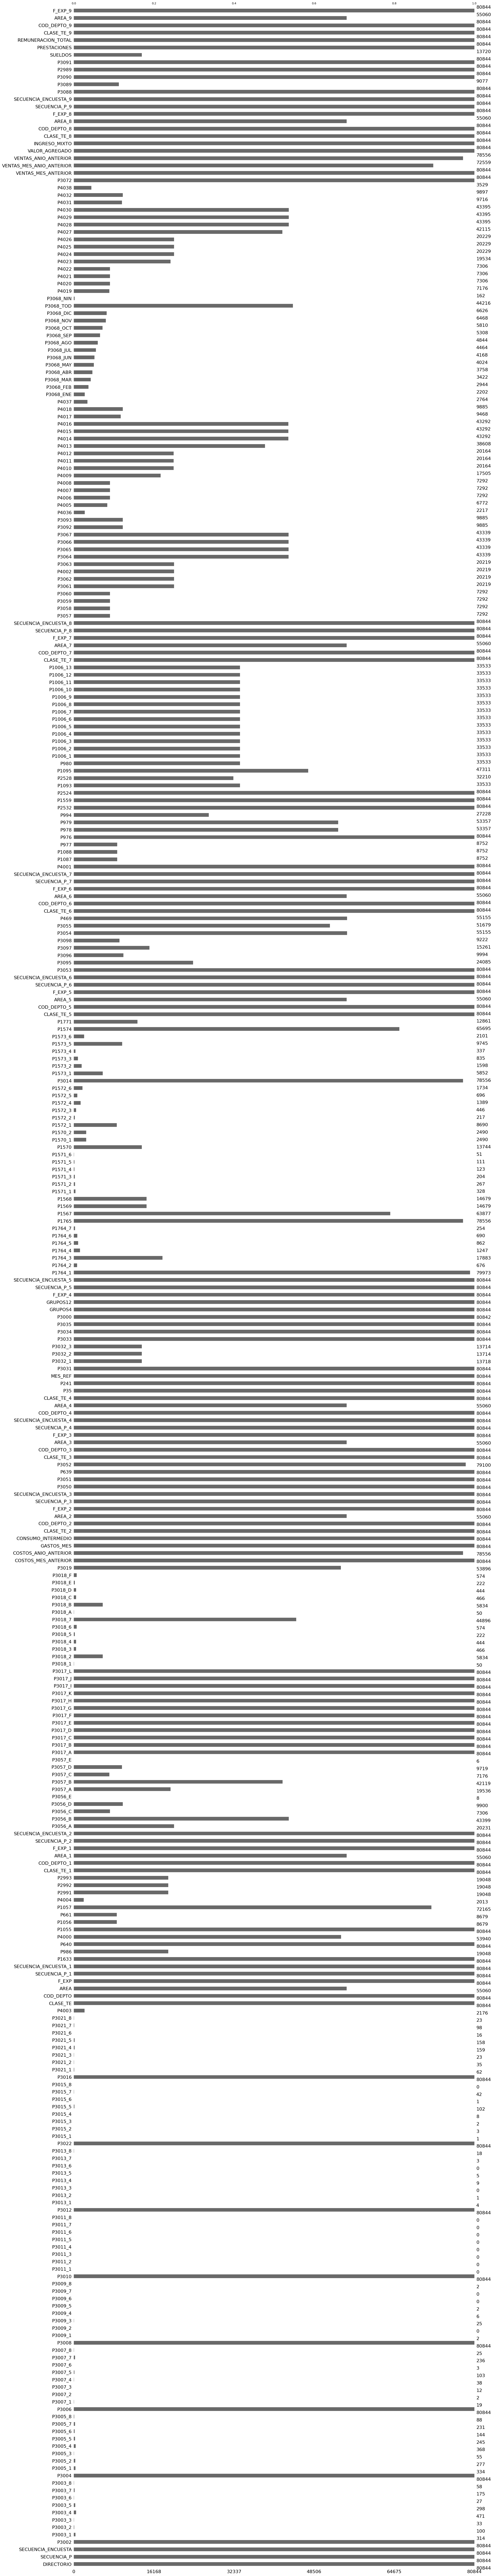

In [ ]:
# Visualizar valores nulos con un gráfico de barras
msno.bar(df_concatenated)


<Axes: >

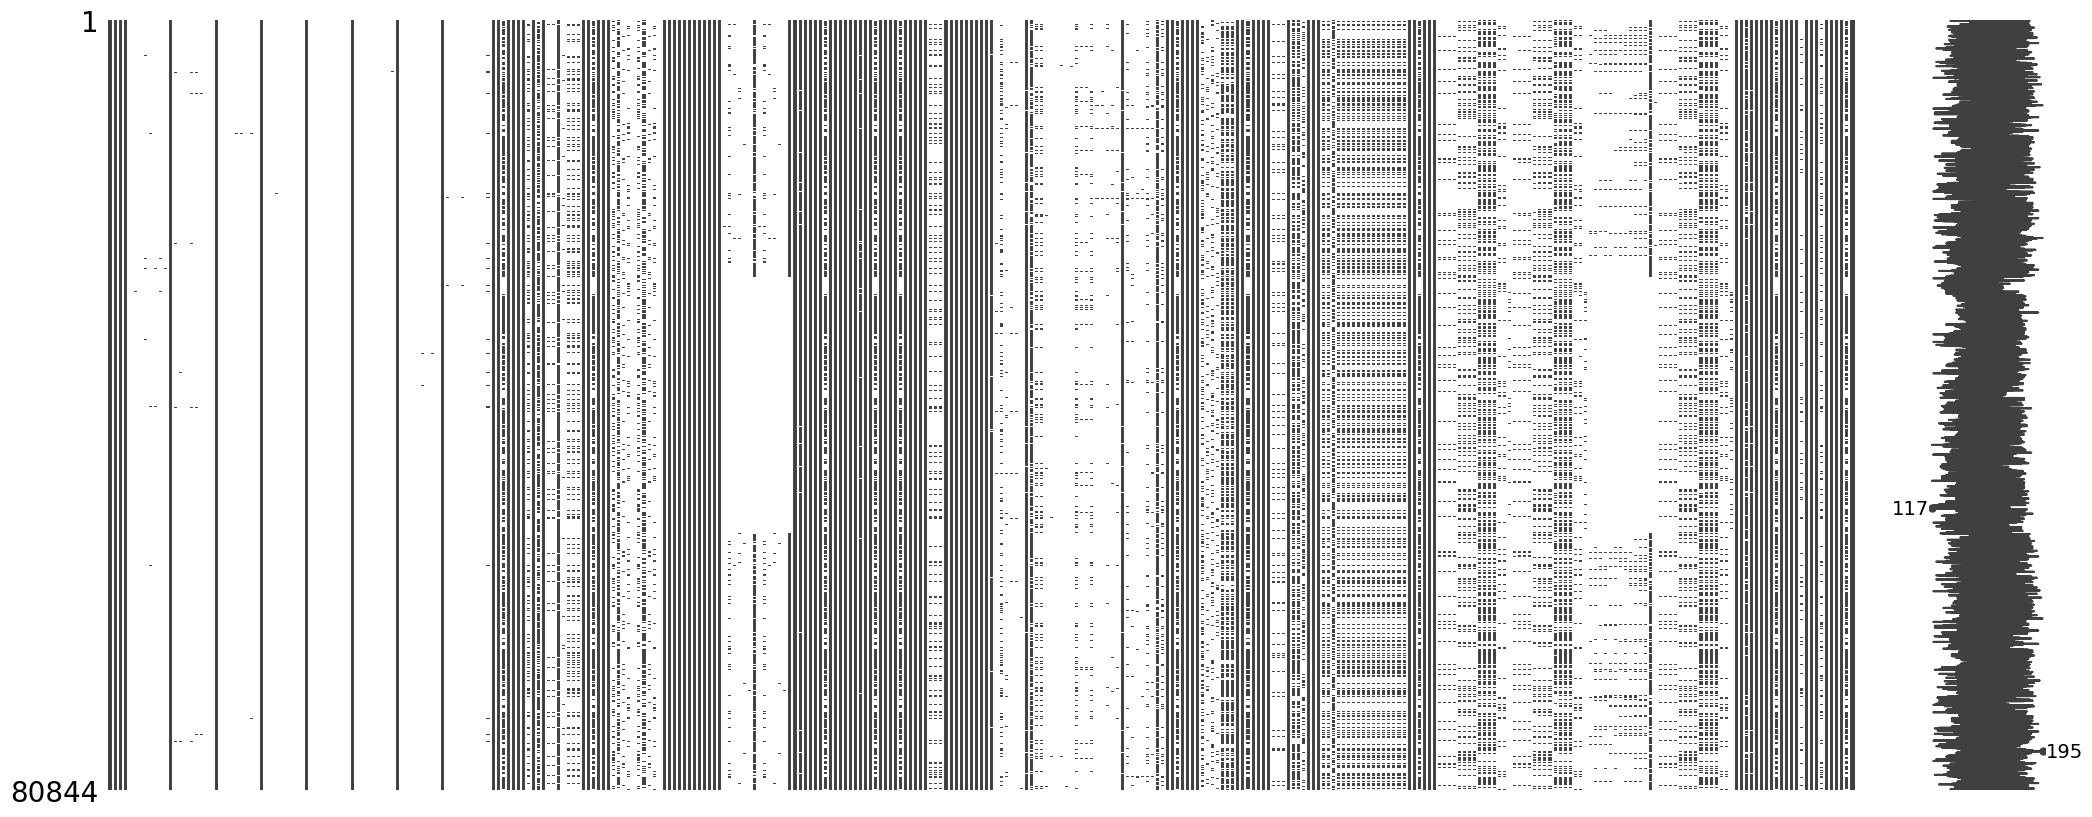

In [ ]:
# Visualizar matriz de valores faltantes
msno.matrix(df_concatenated)

# Sección 2

### Paso 3: Graficar distribuciones


Ahora, vamos a generar gráficos para visualizar algunas características de las microempresas y cualquier otra métrica relevante.

In [ ]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre = 'df_concatenated'
# Organizamos campos no estandarizados

lista_columnas_estandarizar = df_concatenated.columns.tolist()
for col in lista_columnas_estandarizar:
  if col in df_concatenated.columns:
    # Try converting to numeric, if it fails, convert to string
    try:
      df_concatenated[col] = pd.to_numeric(df_concatenated[col], errors='raise')
    except (ValueError, TypeError):
      df_concatenated[col] = df_concatenated[col].astype(str)

# generamos el informe
advert_report = sw.analyze([df_concatenated, nombre], pairwise_analysis="off") # Realizamos el análisis de la base de datos inicial



                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
print(df_concatenated.dtypes)

DIRECTORIO            float64
SECUENCIA_P             int64
SECUENCIA_ENCUESTA      int64
P3002                   int64
P3003_1               float64
                       ...   
REMUNERACION_TOTAL      int64
CLASE_TE_9              int64
COD_DEPTO_9             int64
AREA_9                float64
F_EXP_9                 int64
Length: 347, dtype: object


In [ ]:
#@markdown Guardar y mostrar reporte formato HTML
"""advert_report.show_html('EDA_df.html')"""

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
"""almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  #files.download('/content/EDA_df_concatenated.html')
  files.download('/content/EDA_df.html')"""

"almacenar_archivo = input('Alamcenar archivo Si o No: ').title()\nif almacenar_archivo == 'Si':\n  #files.download('/content/EDA_df_concatenated.html')\n  files.download('/content/EDA_df.html')"

In [ ]:
#@title La función advert_report.show_notebook en Sweetviz muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter.

# Parámetros:

# layout: ajusta el diseño ( 'widescreen' o 'full screen' )
# w y h: ajusta el ancho y alto en píxeles
# scale: ajusta el tamaño (0.9 = 90% de la resolución original)
#advert_report.show_notebook(layout='widescreen', w=1500, h=500, scale=0.9)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#@title La función advert_report.show_notebook muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter, con el siguiente formato:

# layout='vertical': muestra los datos en una columna vertical
# w=1400 y h=500: ajusta el ancho y alto del reporte a 1400x500 píxeles
# scale=0.9: muestra el reporte a un 90% de su tamaño original
#advert_report.show_notebook(layout='vertical', w=1400, h=500, scale=0.9)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# @title eliminar colmnas con una cantidad menor a lo relacionado

# Calculate the percentage of missing values in each column
missing_percentage = df_concatenated_.isnull().sum() / len(df_concatenated_) * 100

# Identify columns with more than 20% missing values
columns_to_drop = missing_percentage[missing_percentage >= 20].index
# columns_to_drop = missing_percentage[(missing_percentage >= 20) & (~missing_percentage.index.str.contains("area", case=False))].index

# Drop the identified columns from the DataFrame
df_concatenated_final = df_concatenated_.drop(columns=columns_to_drop)

# Print the updated DataFrame shape
print(f"Shape of DataFrame after dropping columns: {df_concatenated_final.shape}")

# Now df_concatenated_ contains only the columns with less than or equal 60% of missing values


Shape of DataFrame after dropping columns: (80844, 115)


In [ ]:
df_concatenated_final.shape

(80844, 115)

In [ ]:
(55060/80844)*100


68.10647667111968

In [ ]:
80844-55060

25784

In [ ]:
print(f"Shape of DataFrame after dropping columns: {df_concatenated_final.shape}")
print(df_concatenated_final.dtypes)

Shape of DataFrame after dropping columns: (80844, 115)
DIRECTORIO            float64
SECUENCIA_P            object
SECUENCIA_ENCUESTA     object
P3002                  object
P3004                  object
                       ...   
PRESTACIONES           object
REMUNERACION_TOTAL     object
CLASE_TE_9             object
COD_DEPTO_9            object
F_EXP_9                object
Length: 115, dtype: object


In [ ]:
len(columns_to_drop)

232

In [ ]:
for i in columns_to_drop:
  print(i)

P3003_1
P3003_2
P3003_3
P3003_4
P3003_5
P3003_6
P3003_7
P3003_8
P3005_1
P3005_2
P3005_3
P3005_4
P3005_5
P3005_6
P3005_7
P3005_8
P3007_1
P3007_2
P3007_3
P3007_4
P3007_5
P3007_6
P3007_7
P3007_8
P3009_1
P3009_2
P3009_3
P3009_4
P3009_5
P3009_6
P3009_7
P3009_8
P3011_1
P3011_2
P3011_3
P3011_4
P3011_5
P3011_6
P3011_7
P3011_8
P3013_1
P3013_2
P3013_3
P3013_4
P3013_5
P3013_6
P3013_7
P3013_8
P3015_1
P3015_2
P3015_3
P3015_4
P3015_5
P3015_6
P3015_7
P3015_8
P3021_1
P3021_2
P3021_3
P3021_4
P3021_5
P3021_6
P3021_7
P3021_8
P4003
AREA
P986
P4000
P1056
P661
P4004
P2991
P2992
P2993
AREA_1
P3056_A
P3056_B
P3056_C
P3056_D
P3056_E
P3057_A
P3057_B
P3057_C
P3057_D
P3057_E
P3018_1
P3018_2
P3018_3
P3018_4
P3018_5
P3018_6
P3018_7
P3018_A
P3018_B
P3018_C
P3018_D
P3018_E
P3018_F
P3019
AREA_2
AREA_3
AREA_4
P3032_1
P3032_2
P3032_3
P1764_2
P1764_3
P1764_4
P1764_5
P1764_6
P1764_7
P1567
P1569
P1568
P1571_1
P1571_2
P1571_3
P1571_4
P1571_5
P1571_6
P1570
P1570_1
P1570_2
P1572_1
P1572_2
P1572_3
P1572_4
P1572_5
P1572_6
P1573

<Axes: >

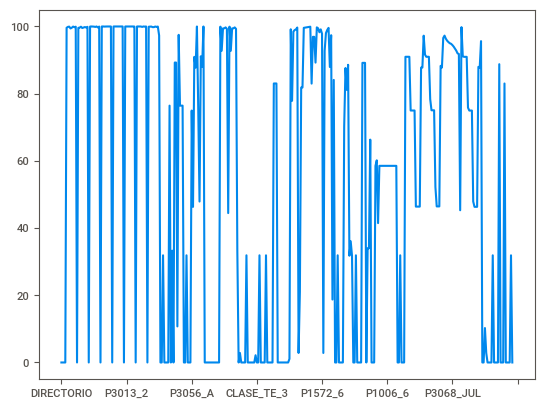

In [ ]:
missing_percentage.plot()

In [ ]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre = 'df_concatenated_final'
# Organizamos campos no estandarizados

lista_columnas_estandarizar = df_concatenated_final.columns.tolist()
for col in lista_columnas_estandarizar:
  if col in df_concatenated_final.columns:
    # Try converting to numeric, if it fails, convert to string
    try:
      df_concatenated_final[col] = pd.to_numeric(df_concatenated_final[col], errors='raise')
    except (ValueError, TypeError):
      df_concatenated_final[col] = df_concatenated_final[col].astype(str)

# generamos el informe
advert_report = sw.analyze([df_concatenated_final, nombre], pairwise_analysis="on") # Realizamos el análisis de la base de datos inicial



                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.11/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
/usr/local/lib/python3.11/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
/usr/local/lib/python3.11/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

In [ ]:
#@markdown Guardar y mostrar reporte formato HTML
#advert_report.show_html('EDA_df.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
"""almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  #files.download('/content/EDA_df_concatenated.html')
  files.download('/content/EDA_df.html')"""

"almacenar_archivo = input('Alamcenar archivo Si o No: ').title()\nif almacenar_archivo == 'Si':\n  #files.download('/content/EDA_df_concatenated.html')\n  files.download('/content/EDA_df.html')"

In [ ]:
#@title La función advert_report.show_notebook en Sweetviz muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter.

# Parámetros:

# layout: ajusta el diseño ( 'widescreen' o 'full screen' )
# w y h: ajusta el ancho y alto en píxeles
# scale: ajusta el tamaño (0.9 = 90% de la resolución original)
advert_report.show_notebook(layout='widescreen', w=1500, h=500, scale=0.9)

Output hidden; open in https://colab.research.google.com to view.

![](https://i.pinimg.com/originals/88/66/7e/88667eaf29f1bbf12d64abaaeae6caa2.gif)

# sección 3

In [ ]:
df_concatenated_final

,DIRECTORIO,SECUENCIA_P,SECUENCIA_ENCUESTA,P3002,P3004,P3006,P3008,P3010,P3012,P3022,...,SECUENCIA_ENCUESTA_9,P3088,P3090,P2989,P3091,PRESTACIONES,REMUNERACION_TOTAL,CLASE_TE_9,COD_DEPTO_9,F_EXP_9
0,7277093.0,1,1,2,2,2,2,2,2,2,...,1,2,2,2,2,0,0,2,5,348373147591954
1,7277104.0,1,1,2,2,2,2,2,2,2,...,1,2,2,2,1,0,0,1,5,874156970299431
2,7277108.0,1,3,2,2,2,2,2,2,2,...,3,2,2,2,1,0,0,1,5,741007415902177
3,7277114.0,1,1,2,2,2,2,2,2,2,...,1,1,2,2,3,336000,2936000,1,5,132473094961111
4,7277119.0,1,1,2,2,2,2,2,2,2,...,1,2,2,2,1,0,0,2,5,147852291906858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80839,7398708.0,1,1,2,2,2,2,2,2,2,...,1,2,2,2,1,0,0,1,5,127148283176528
80840,7398718.0,1,3,2,2,2,2,2,2,2,...,3,1,1,1,2,359411,359411,1,5,673799142154123
80841,7398720.0,1,1,2,2,2,2,2,2,2,...,1,2,2,2,1,0,0,1,5,519769465971771
80842,7398725.0,1,1,2,2,2,2,2,2,2,...,1,2,2,2,1,0,0,1,5,14037414867365


In [ ]:
%pip install h2o
%pip install rdt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=ba7de7b6740dca6efbc5486d93f819f2036f513e5f9315bbeddf1b24db534bc3
  Stored in directory: /root/.cache/pip/wheels/62/f9/aa/687bd54342d2981bc78e22ee9b9bc39f92006e344e7aa1e0ac
Successfully built h2o
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.9 MB/s eta 0:00:00


In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h2o
from h2o.estimators.kmeans import H2OKMeansEstimator
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from rdt import HyperTransformer

In [ ]:
df_concatenated_final.shape

(80844, 115)

In [ ]:
80844*115

9297060

In [ ]:
df_concatenated_final.isna().sum().sum()

43882

<Axes: >

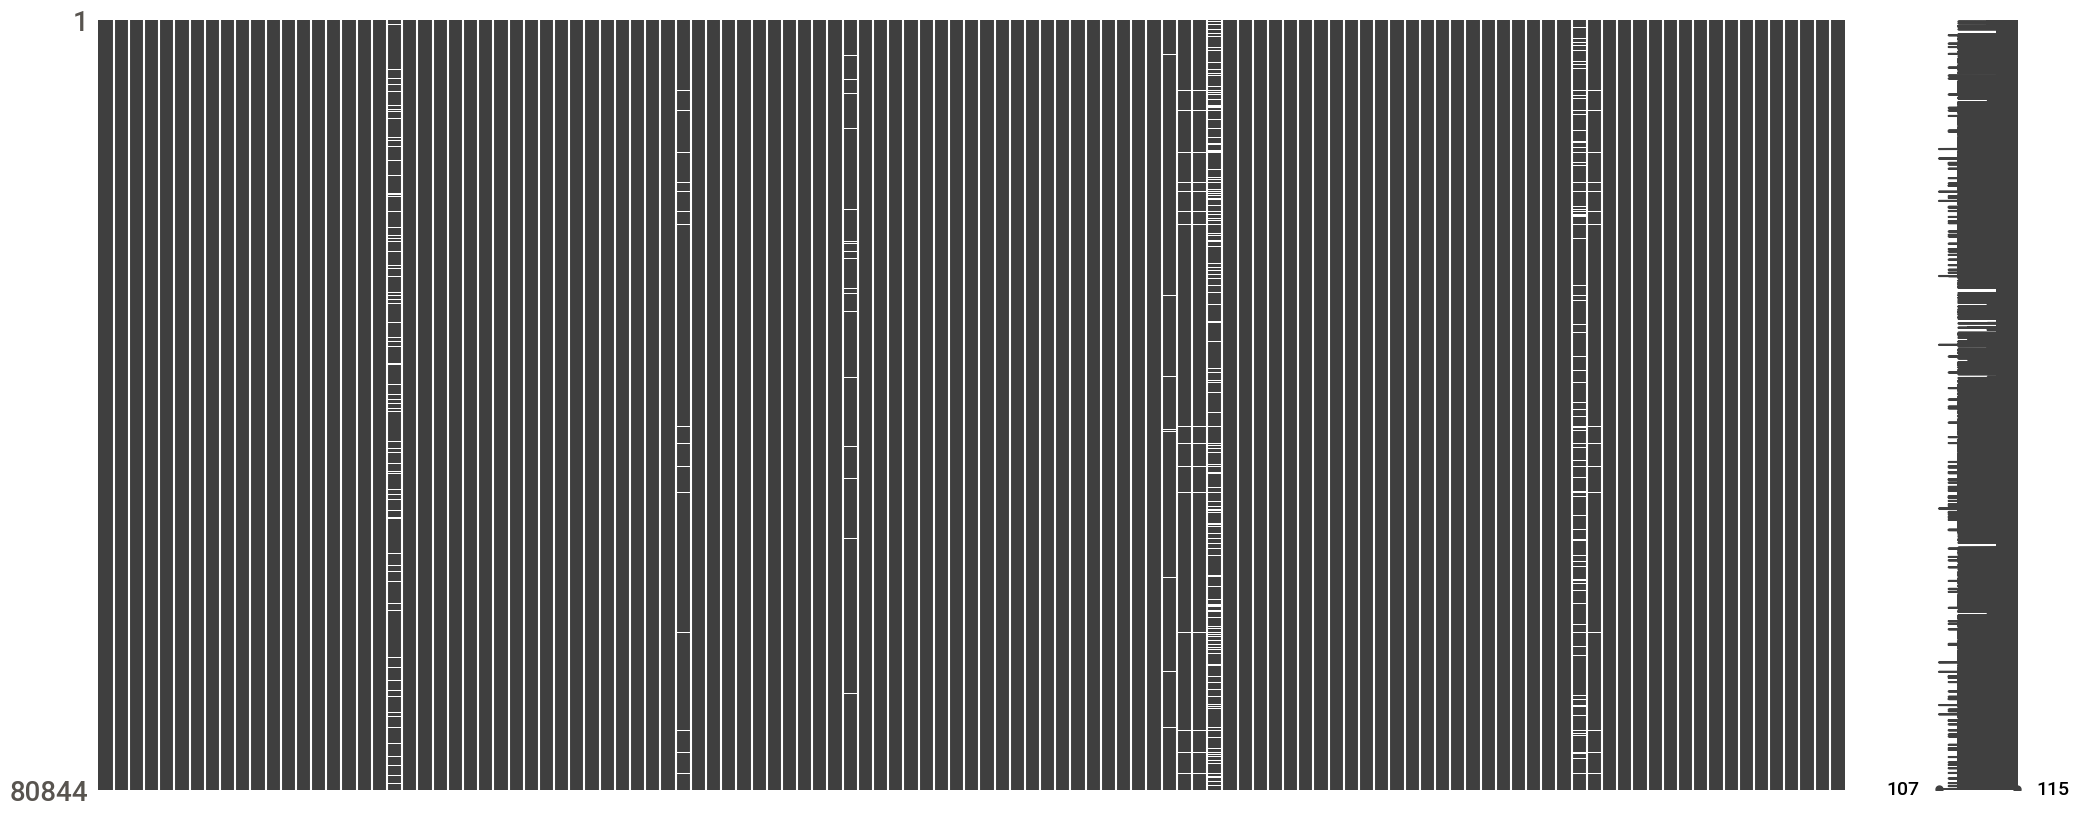

In [ ]:
msno.matrix(df_concatenated_final)

In [ ]:
# prompt: necesito saber cual es el nombre de las columnas que tienen vacios en df_concatenated_final

# Get columns with missing values
columns_with_missing_values = df_concatenated_final.columns[df_concatenated_final.isnull().any()].tolist()

# Print the names of the columns
columns_with_missing_values


['P1057',
 'COSTOS_ANIO_ANTERIOR',
 'P3052',
 'P3000',
 'P1764_1',
 'P1765',
 'P3014',
 'P1574',
 'VENTAS_MES_ANIO_ANTERIOR',
 'VENTAS_ANIO_ANTERIOR']

In [ ]:
df_concatenated_final.shape

(80844, 115)

<Axes: >

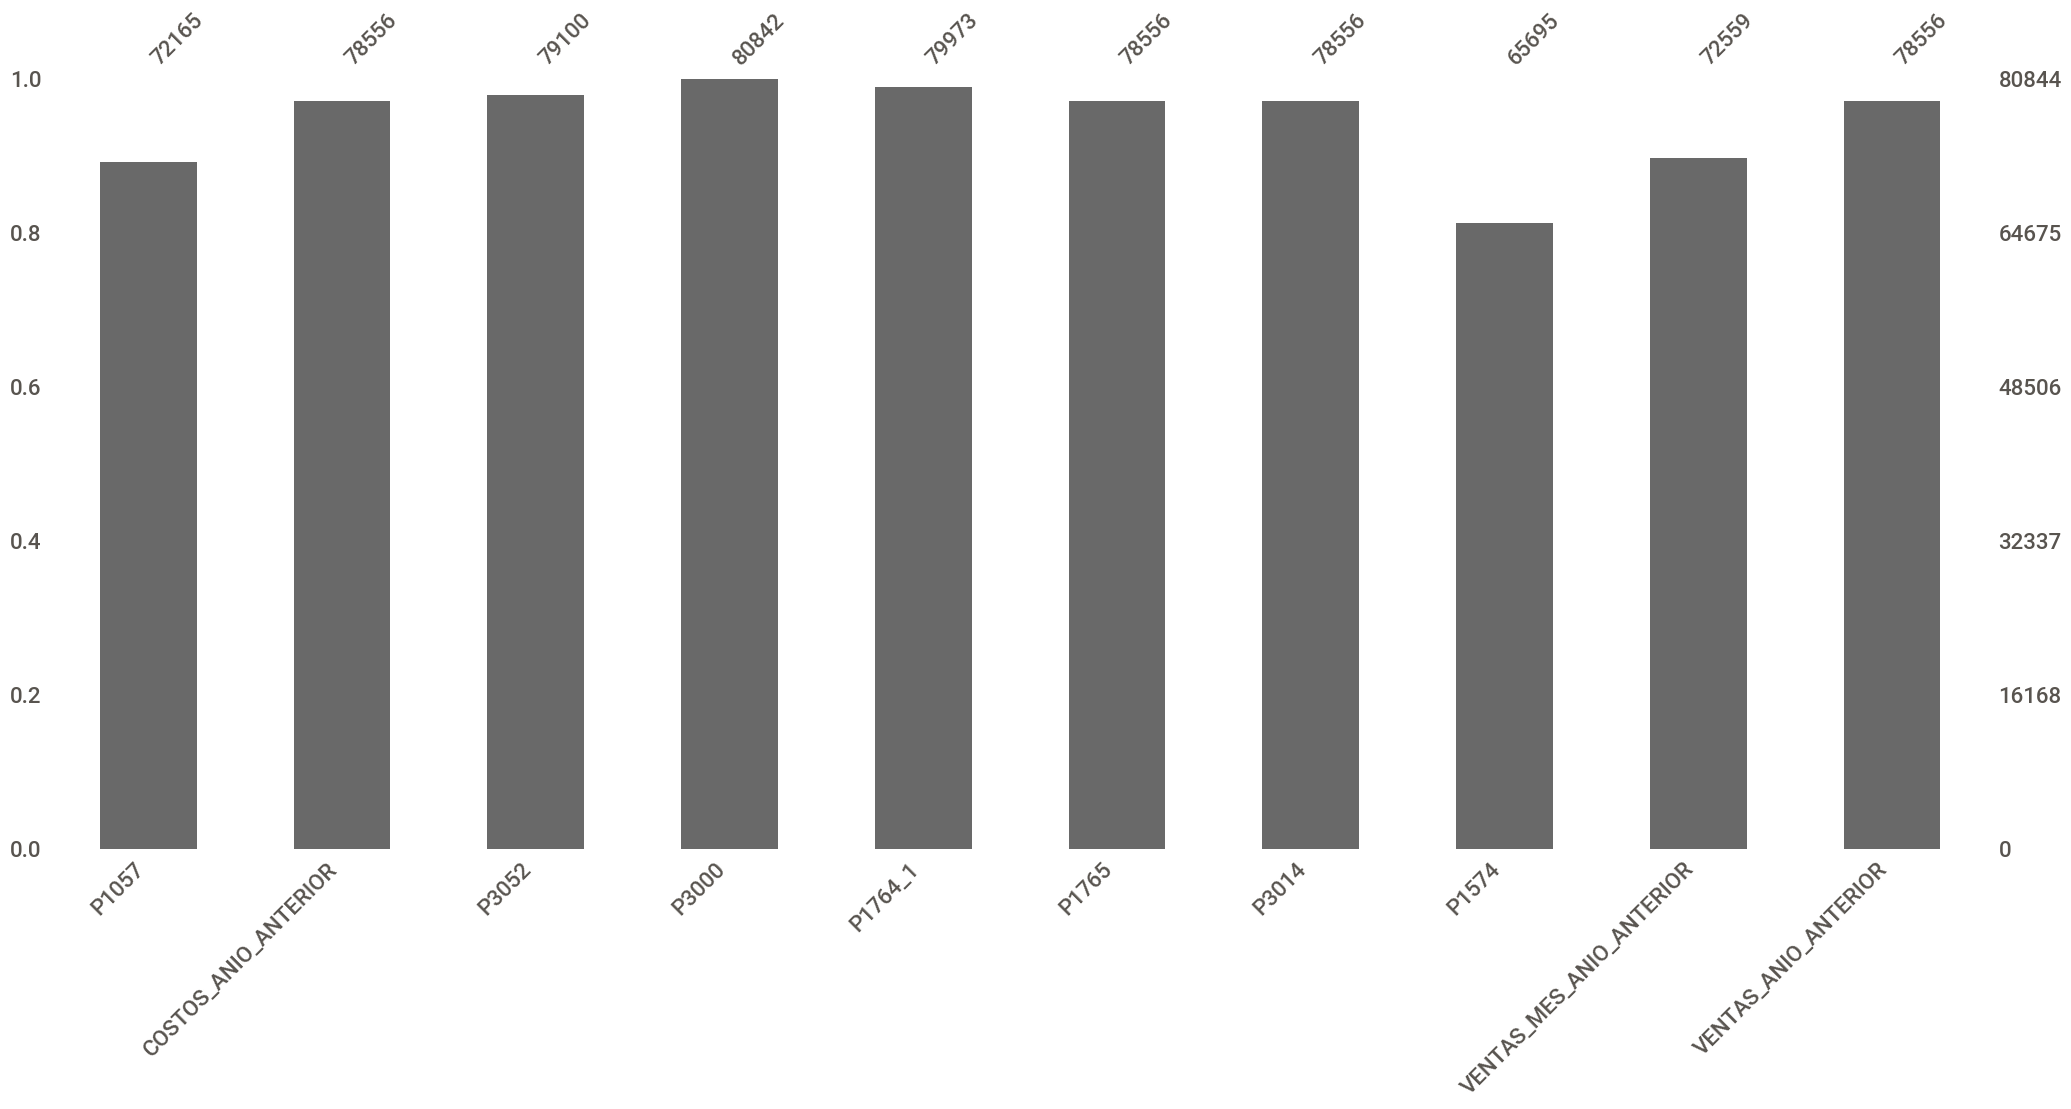

In [ ]:
msno.bar(df_concatenated_final[columns_with_missing_values])

In [ ]:
80844-53273

27571

In [ ]:
df_concatenated_final_ = df_concatenated_final.dropna().copy()

In [ ]:
df_concatenated_final_.shape

(53273, 115)

<Axes: >

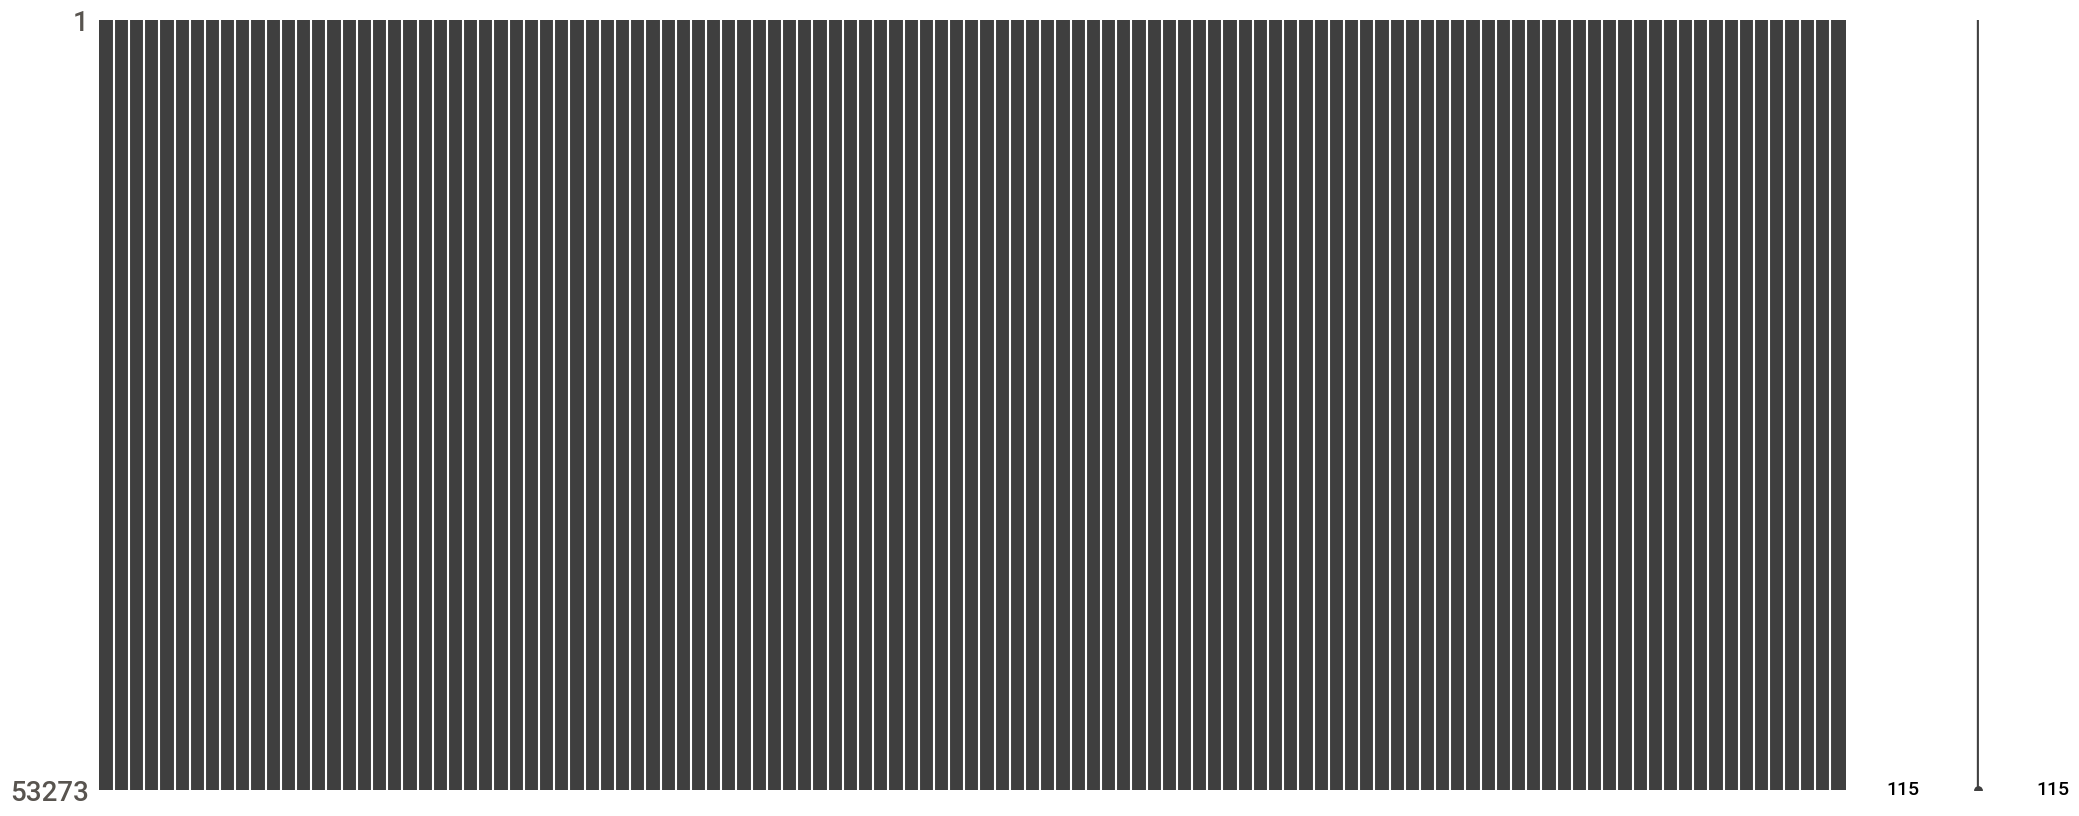

In [ ]:
msno.matrix(df_concatenated_final_)

In [48]:
# prompt: necesito que me ordenes las características con mayor relevancia luego de realizar lo siguiente:
# pca = PCA(n_components=2)
# df_pca = pca.fit_transform(df_transformed)

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'df_concatenated_final_' is your DataFrame
# and it has been preprocessed as shown in the code.

# Select numerical columns for PCA
numeric_cols = df_concatenated_final_.select_dtypes(include=['number'])

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_cols)

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Get explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame with feature importance based on explained variance
feature_importance = pd.DataFrame({'feature': numeric_cols.columns,
                                    'importance': abs(pca.components_[0])}) # Use absolute value for ranking

# Sort by importance in descending order
feature_importance = feature_importance.sort_values('importance', ascending=False)


print("Feature Importance after PCA:")
print(feature_importance)

#Now you have feature_importance sorted, so you can access the features in order of importance:
most_important_features = feature_importance["feature"].to_list()
print("\nMost important features (ordered):", most_important_features)


Feature Importance after PCA:
       feature    importance
89  CLASE_TE_7  2.645564e-01
73  CLASE_TE_5  2.645564e-01
41  CLASE_TE_2  2.645564e-01
79  CLASE_TE_6  2.645564e-01
20  CLASE_TE_1  2.645564e-01
..         ...           ...
6        P3008  7.866635e-05
7        P3010  3.330669e-16
18       P1055  1.654361e-24
71       P3014  0.000000e+00
69     P1764_1  0.000000e+00

[114 rows x 2 columns]

Most important features (ordered): ['CLASE_TE_7', 'CLASE_TE_5', 'CLASE_TE_2', 'CLASE_TE_6', 'CLASE_TE_1', 'CLASE_TE_8', 'CLASE_TE_4', 'CLASE_TE_3', 'CLASE_TE', 'CLASE_TE_9', 'GRUPOS4', 'GRUPOS12', 'SECUENCIA_ENCUESTA_8', 'SECUENCIA_ENCUESTA_4', 'SECUENCIA_ENCUESTA_1', 'SECUENCIA_ENCUESTA_3', 'SECUENCIA_ENCUESTA_6', 'SECUENCIA_ENCUESTA_9', 'SECUENCIA_ENCUESTA_5', 'SECUENCIA_ENCUESTA_7', 'SECUENCIA_ENCUESTA_2', 'SECUENCIA_ENCUESTA', 'P3053', 'P3034', 'P2524', 'P241', 'P639', 'P976', 'P3031', 'P3050', 'P3002', 'P4001', 'P1559', 'P1633', 'P3006', 'P3017_C', 'P3091', 'F_EXP_9', 'F_EXP_6', 'F_EXP

In [49]:
# prompt: necesito seleccionar las características que contengan un 80% de la varianza en feature_importance

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find the number of components that explain at least 80% of the variance
n_components_80 = np.argmax(cumulative_variance >= 0.95) + 1

# Select features based on the components that explain 80% of variance
selected_features = feature_importance['feature'][:n_components_80].tolist()

print(f"\nNumber of components explaining 80% variance: {n_components_80}")
print(f"\nSelected features explaining 80% variance: {selected_features}")



Number of components explaining 80% variance: 1

Selected features explaining 80% variance: ['CLASE_TE_7']


In [50]:
most_important_features[:20]

['CLASE_TE_7',
 'CLASE_TE_5',
 'CLASE_TE_2',
 'CLASE_TE_6',
 'CLASE_TE_1',
 'CLASE_TE_8',
 'CLASE_TE_4',
 'CLASE_TE_3',
 'CLASE_TE',
 'CLASE_TE_9',
 'GRUPOS4',
 'GRUPOS12',
 'SECUENCIA_ENCUESTA_8',
 'SECUENCIA_ENCUESTA_4',
 'SECUENCIA_ENCUESTA_1',
 'SECUENCIA_ENCUESTA_3',
 'SECUENCIA_ENCUESTA_6',
 'SECUENCIA_ENCUESTA_9',
 'SECUENCIA_ENCUESTA_5',
 'SECUENCIA_ENCUESTA_7']

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,39 mins 46 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 13 days
H2O_cluster_name:,H2O_from_python_unknownUser_2rwob8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.148 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


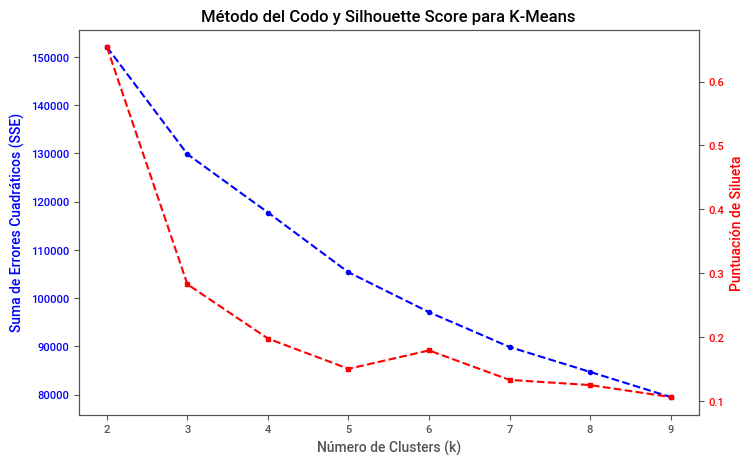

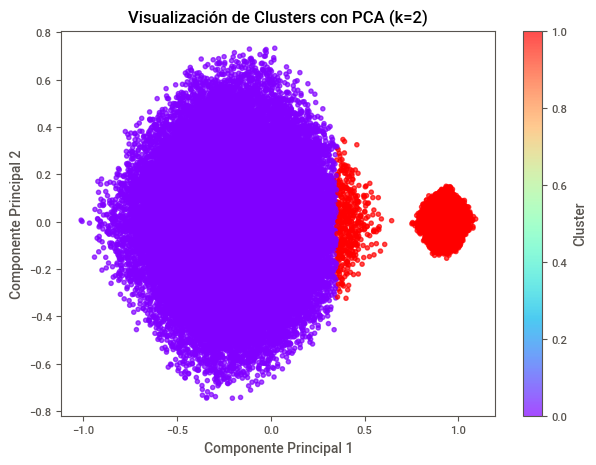

In [59]:
# @title modelo
# 🔹 Inicializar H2O
h2o.init()

# 1️⃣ Cargar el dataset
df = df_concatenated_final_[most_important_features[:5]].copy() # Pueden variar la cantidad de características 10, 20, 50, 5

# 3️⃣ Aplicar transformación con RDT 🚀
ht = HyperTransformer()
ht.detect_initial_config(df)
ht.fit(df)
df_transformed = ht.transform(df)
df_transformed = pd.DataFrame(df_transformed, columns=df.columns)

# 4️⃣ Convertir a H2OFrame 📄
df_h2o = h2o.H2OFrame(df_transformed)

# 5️⃣ Aplicar PCA y reducir a 2 dimensiones
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_transformed)

# 6️⃣ Definir valores de K a probar
k_values = range(2, 10)
sse_values = []
silhouette_values = []
cluster_results = {}

for k in k_values:
    # 🔹 Definir y entrenar K-Means en H2O
    kmeans = H2OKMeansEstimator(k=k)
    kmeans.train(x=df_h2o.columns, training_frame=df_h2o)

    # 🔹 Obtener SSE
    sse_values.append(kmeans.tot_withinss())

    # 🔹 Obtener etiquetas de clusters y calcular la silueta
    cluster_assignments = kmeans.predict(df_h2o)
    labels = h2o.as_list(cluster_assignments).values.flatten()
    # silhouette
    silhouette_avg = silhouette_score(df_pca, labels)  # Calcular silhouette
    silhouette_values.append(silhouette_avg)

    # Guardar resultados para visualización
    cluster_results[k] = labels

# 🔹 Graficar Método del Codo y Silhouette Score
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(k_values, sse_values, marker='o', linestyle='--', color='b', label='SSE')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Suma de Errores Cuadráticos (SSE)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_values, marker='s', linestyle='--', color='r', label='Silhouette Score')
ax2.set_ylabel('Puntuación de Silueta', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Método del Codo y Silhouette Score para K-Means')
plt.show()

# 🔹 Visualización de los Clusters en 2D (PCA)
best_k = max(cluster_results, key=lambda k: silhouette_values[k_values.index(k)])  # k con mejor silhouette
best_labels = cluster_results[best_k]

plt.figure(figsize=(7, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=best_labels, cmap='rainbow', alpha=0.7)
plt.title(f'Visualización de Clusters con PCA (k={best_k})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

In [52]:
pd.DataFrame(best_labels).value_counts()#/pd.DataFrame(best_labels).value_counts().sum()

,count
0,
0,50150
1,3123


In [53]:
df_concatenated_final_[best_labels==0]

,DIRECTORIO,SECUENCIA_P,SECUENCIA_ENCUESTA,P3002,P3004,P3006,P3008,P3010,P3012,P3022,...,SECUENCIA_ENCUESTA_9,P3088,P3090,P2989,P3091,PRESTACIONES,REMUNERACION_TOTAL,CLASE_TE_9,COD_DEPTO_9,F_EXP_9
1,7277104.0,1,1,2,2,2,2,2,2,2,...,1,2,2,2,1,0,0,1,5,874156970299431
2,7277108.0,1,3,2,2,2,2,2,2,2,...,3,2,2,2,1,0,0,1,5,741007415902177
3,7277114.0,1,1,2,2,2,2,2,2,2,...,1,1,2,2,3,336000,2936000,1,5,132473094961111
4,7277119.0,1,1,2,2,2,2,2,2,2,...,1,2,2,2,1,0,0,2,5,147852291906858
5,7277123.0,1,1,2,2,2,2,2,2,2,...,1,2,2,2,1,0,0,1,5,122928323948358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80833,7398688.0,1,1,2,2,2,2,2,2,2,...,1,2,2,2,1,0,0,1,5,681329021759731
80836,7398691.0,1,1,2,2,2,2,2,2,2,...,1,2,2,2,1,0,0,1,5,729273671185207
80838,7398706.0,1,1,2,2,2,2,2,2,2,...,1,2,2,2,1,0,0,1,5,688766329595882
80841,7398720.0,1,1,2,2,2,2,2,2,2,...,1,2,2,2,1,0,0,1,5,519769465971771


In [54]:
df_concatenated_final_[best_labels==1]

,DIRECTORIO,SECUENCIA_P,SECUENCIA_ENCUESTA,P3002,P3004,P3006,P3008,P3010,P3012,P3022,...,SECUENCIA_ENCUESTA_9,P3088,P3090,P2989,P3091,PRESTACIONES,REMUNERACION_TOTAL,CLASE_TE_9,COD_DEPTO_9,F_EXP_9
24,7277178.0,1,6,2,2,2,2,2,2,2,...,6,2,2,2,1,0,0,2,44,121776407821714
39,7277227.0,1,5,2,2,2,2,2,2,2,...,5,2,2,2,1,0,0,1,68,166360553517176
146,7277690.0,1,5,2,2,2,2,2,2,2,...,5,2,2,2,1,0,0,1,8,659090732490301
147,7277690.0,1,6,2,2,2,2,2,2,2,...,6,2,2,2,1,0,0,1,8,659090732490301
155,7277713.0,1,4,2,2,2,2,2,2,2,...,4,2,2,2,1,0,0,1,8,580747602164125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80744,7398237.0,1,4,2,2,2,2,2,2,2,...,4,2,2,2,1,0,0,1,76,103073735363883
80780,7398502.0,1,5,2,2,2,2,2,2,2,...,5,2,2,2,1,0,0,2,8,102299022379732
80788,7398521.0,1,4,2,2,2,2,2,2,2,...,4,2,2,2,2,0,0,2,8,156119854594202
80823,7398660.0,1,5,2,2,2,2,2,2,2,...,5,2,2,2,1,0,0,1,5,892397544409084


In [55]:
df_concatenated_final_.shape

(53273, 115)

In [60]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre1 = 'df_concatenated_final_grupo1'
nombre2 = 'df_concatenated_final_grupo2'
# generamos el informe

lista_columnas_estandarizar = df_concatenated_final_.columns.tolist()
for col in lista_columnas_estandarizar:
  # if col in df_concatenated_final_.columns:
    # Try converting to numeric, if it fails, convert to string
    # try:
      # df_concatenated_final_[col] = pd.to_numeric(df_concatenated_final_[col], errors='raise')
    # except (ValueError, TypeError):
  df_concatenated_final_[col] = df_concatenated_final_[col].astype(str)

advert_report = sw.compare([df_concatenated_final_[best_labels==0], nombre1], [df_concatenated_final_[best_labels==1], nombre2]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df_comparativa.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
# almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
# if almacenar_archivo == 'Si':
  #files.download('/content/EDA_df_concatenated.html')
files.download('/content/EDA_df_comparativa.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df_comparativa.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title La función advert_report.show_notebook en Sweetviz muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter.

# Parámetros:

# layout: ajusta el diseño ( 'widescreen' o 'full screen' )
# w y h: ajusta el ancho y alto en píxeles
# scale: ajusta el tamaño (0.9 = 90% de la resolución original)
advert_report.show_notebook(layout='widescreen', w=1500, h=500, scale=0.9)